In [1]:
import pickle
import numpy as np

# Previous version: 2023
# with open("./results/params_search_ppo.pickle", 'rb') as f:
#     result = pickle.load(f)
    
# Current version: 2024
with open("./results/params_search_PPO_solid.pkl", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']
tbr = np.array([result['state'][idx]['TBR'] for idx in range(len(tau))])
T = np.array([result['control'][idx]['T_avg'] for idx in range(len(tau))])

tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

# 2023 version
indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1) * (tbr >= 1) * (tbr < 2)) == 1)
print("indices : ", indices[0])

indices :  [ 824 3019 8751]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


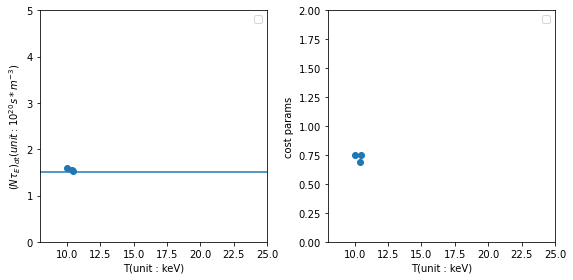

In [2]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

# Lawson-criteria
T = np.array([result['control'][idx]['T_avg'] for idx in indices[0]])
n_tau = np.array([result['state'][idx]['n_tau'] for idx in indices[0]])
n_tau_T = T * n_tau

# Cost paramter
cost = np.array([result['state'][idx]['cost'] for idx in indices[0]])

fig, axes = plt.subplots(1,2,figsize = (8,4))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.axhline(1.5, 0, 1)
ax.set_xlim([8,25])
ax.set_ylim([0,5])
ax.legend()

ax = axes[1]
ax.scatter(T, cost)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("cost params")
ax.set_xlim([8,25])
ax.set_ylim([0,2])
ax.legend()

fig.tight_layout()

In [3]:
arg_min = np.argmin(cost)
arg_min = indices[0][arg_min]

for key in result['state'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['state'][arg_min][key]))
    
for key in result['control'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['control'][arg_min][key]))
    

R : 3.697
a : 0.888
blanket_thickness : 0.899
coil_thickness : 1.262
n : 2.174
TBR : 1.336
beta : 3.887
tau : 0.710
Ip : 8.058
q : 2.286
f_BS : 0.516
Q_parallel : 396.155
n_g : 3.251
q_kink : 2.000
beta_troyon : 4.235
f_NC : 0.790
n_tau : 1.543
n_tau_lower : 3.808
cost : 0.687
betan : 3.500
k : 1.899
epsilon : 4.162
electric_power : 500000000.000
T_avg : 10.414
B0 : 15.315
H : 1.300
armour_thickness : 0.000
RF_recirculating_rate : 0.200


### Gridsearch case

In [16]:
import pickle
import numpy as np

with open("./results/params_search_gridsearch_solid.pkl", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']
tbr = np.array([result['state'][idx]['TBR'] for idx in range(len(tau))])
T = np.array([result['control'][idx]['T_avg'] for idx in range(len(tau))])

tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1) * (tbr >= 1) * (tbr < 2)) == 1)
print("indices : ", indices[0])
print("# of cases : {}".format(len(indices[0])))

indices :  [  20   24   26   27   28   29   70   74   76   77   78   79  120  128
  129  170  178  179  220  224  227  228  229  270  274  277  278  279
  320  324  326  327  328  329  370  374  376  377  378  379  420  424
  427  428  429  470  474  477  478  479  519  523  527  528  569  573
  577  578  619  627  628  669  677  678  719  723  727  728  769  773
  777  778  918  922  926  927  968  972  976  977 1118 1122 1126 1127
 1168 1172 1176 1177 1218 1222 1224 1225 1226 1227 1268 1272 1274 1275
 1276 1277 1518 1522 1525 1526 1527 1568 1572 1575 1576 1577 1618 1622
 1625 1626 1627 1668 1672 1675 1676 1677 1717 1721 1723 1724 1725 1726
 1767 1771 1773 1774 1775 1776 1817 1821 1825 1826 1867 1871 1875 1876
 1917 1921 1924 1925 1926 1967 1971 1974 1975 1976 2117 2121 2123 2124
 2125 2126 2167 2171 2173 2174 2175 2176 2616 2620 2622 2623 2624 2625
 2666 2670 2672 2673 2674 2675 3015 3019 3021 3022 3023 3024 3065 3069
 3071 3072 3073 3074 3115 3123 3124 3165 3173 3174 3215 3219 3222 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


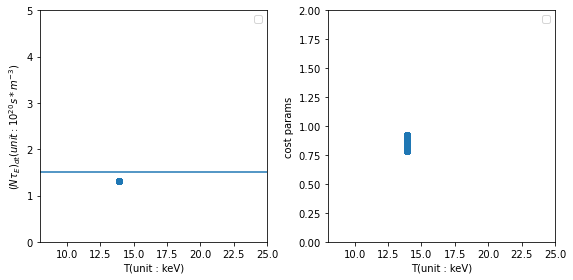

In [17]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

# Lawson-criteria
T = np.array([result['control'][idx]['T_avg'] for idx in indices[0]])
n_tau = np.array([result['state'][idx]['n_tau'] for idx in indices[0]])
n_tau_T = T * n_tau

# Cost paramter
cost = np.array([result['state'][idx]['cost'] for idx in indices[0]])

fig, axes = plt.subplots(1,2,figsize = (8,4))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.axhline(1.5, 0, 1)
ax.set_xlim([8,25])
ax.set_ylim([0,5])
ax.legend()

ax = axes[1]
ax.scatter(T, cost)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("cost params")
ax.set_xlim([8,25])
ax.set_ylim([0,2])
ax.legend()

fig.tight_layout()

In [18]:
arg_min = np.argmin(cost)
arg_min = indices[0][arg_min]

for key in result['state'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['state'][arg_min][key]))
    
for key in result['control'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['control'][arg_min][key]))
    

R : 6.537
a : 1.528
blanket_thickness : 0.895
coil_thickness : 0.877
n : 1.365
TBR : 1.044
beta : 3.133
tau : 0.961
Ip : 10.496
q : 2.113
f_BS : 0.372
Q_parallel : 583.479
n_g : 1.431
q_kink : 2.000
beta_troyon : 3.146
f_NC : 0.848
n_tau : 1.312
n_tau_lower : 2.574
cost : 0.788
betan : 3.500
k : 1.500
epsilon : 4.278
electric_power : 1277777777.778
T_avg : 13.889
B0 : 12.444
H : 1.267
armour_thickness : 0.006
RF_recirculating_rate : 0.100
